In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
numSamples = 204

base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
dataset = pd.read_excel(base_dir+'\_data\HOA_PD_SRM_Output_StatsTable__05-Jun-2024.xlsx')


### Extract the Inputs and Outputs of the Model

In [3]:
input = dataset.iloc[:, 43:47]
input_arr = input.to_numpy()

output = dataset.iloc[:, 79:87]
output_arr = output.to_numpy()

Xtrain, Xtest, Ytrain, Ytest = train_test_split(input_arr, output_arr, test_size=0.3, train_size=0.7)

### Complete PCA and find Principal Components

In [4]:
def runPCA(trainData, testData, isY, threshold = 0.85):
    scaling = StandardScaler()
    scaled_train = scaling.fit_transform(trainData)
    scaled_test = scaling.transform(testData)

    principal_comp = PCA()
    trainData = principal_comp.fit(scaled_train)
    
    cum_variance = np.cumsum(principal_comp.explained_variance_ratio_)
    num_components = np.argmax(cum_variance >= threshold) + 1

    if isY:
        principal_comp = PCA(n_components=1)
    else:
        principal_comp = PCA(n_components=num_components)
        
    trainData = principal_comp.fit_transform(scaled_train)
    testData = principal_comp.transform(scaled_test)

    return trainData, testData, principal_comp, scaling

##PCA with Input Features
input_pca = runPCA(Xtrain, Xtest, False)
x_train = input_pca[0]
x_test = input_pca[1]
print("X = \n", "Training= \n", x_train, "\n Testing= \n", x_test)
# print(x.shape)
pca_in = input_pca[2]
# scale = input_pca[3]
# print(pca_in, scale)

X = 
 Training= 
 [[ 0.2775425  -0.51170989 -0.85173685]
 [-0.41284649 -0.26244824 -0.73345045]
 [-0.32943937 -0.64536406 -0.51545327]
 [ 0.07180795  0.21126739  0.94774272]
 [-0.71411518 -0.44045542 -0.58256271]
 [ 1.44229173 -0.51134195  1.16196537]
 [-1.12909152  0.30688409 -0.26184255]
 [-0.88004719 -0.19185816 -0.1815264 ]
 [ 0.57047784 -0.87985646 -0.02747614]
 [ 2.01674843 -0.43232184  1.52356257]
 [ 0.99386461 -1.08250471 -0.35539231]
 [ 0.03590949  0.02987408 -0.84730236]
 [-0.17622478 -0.36541454  0.71907375]
 [-0.96200076 -0.0069787   0.29378649]
 [-2.18905951  0.31324571 -0.3968212 ]
 [ 0.63152898 -0.5396838   0.45531269]
 [ 2.42103886  1.32540396 -1.55047859]
 [ 1.22365741 -0.37312816  0.22630665]
 [-1.25896498  0.46316582 -0.41952063]
 [ 1.00925791 -0.61557993  0.90076411]
 [-0.64318867 -0.45237742 -0.63156419]
 [ 0.69432399  0.66050923  0.34075402]
 [ 0.51190557  1.66291553 -1.18390422]
 [ 1.53757149 -0.72782857  0.85569083]
 [ 0.63528363 -0.61717108  0.27954532]
 [-0.80

In [5]:
##PCA with Output Features
output_pca = runPCA(Ytrain, Ytest, True)
y_train = output_pca[0]
y_test = output_pca[1]
print("Y = \n", "Training= \n", y_train, "\n Testing= \n", y_test)
# print(x.shape)
pca_out = output_pca[2]

Y = 
 Training= 
 [[-0.72605087]
 [-0.20676733]
 [ 0.59087099]
 [ 2.84742477]
 [-0.27045895]
 [ 1.78581371]
 [-0.91936257]
 [-1.48742309]
 [ 0.55331557]
 [ 0.52188229]
 [ 0.34173817]
 [-2.04658072]
 [ 1.49736327]
 [-1.21089546]
 [-0.16949369]
 [ 0.82951336]
 [-2.12074182]
 [-0.68134395]
 [-3.30435895]
 [ 0.7756959 ]
 [-0.31967561]
 [ 0.25924224]
 [-0.96321955]
 [ 0.91001032]
 [ 1.04534808]
 [-0.29253669]
 [ 0.93862986]
 [ 2.1769925 ]
 [ 1.48806918]
 [-0.74865542]
 [-0.59307255]
 [-0.99831086]
 [-0.05294538]
 [ 0.95184241]
 [-0.86628632]
 [ 0.74880313]
 [-1.24208069]
 [-0.53063033]
 [ 0.0482243 ]
 [ 0.11869497]
 [ 0.0516025 ]
 [ 1.17637472]
 [ 0.48797571]
 [-1.87770709]
 [ 2.53383923]
 [ 0.84054233]
 [-0.95775102]
 [-0.21800742]
 [ 0.51672001]
 [ 0.35787693]
 [-1.76175298]
 [-0.81001979]
 [ 2.1425752 ]
 [-1.63612579]
 [-1.56547754]
 [-1.14786395]
 [-1.68519472]
 [-0.06071945]
 [ 0.56701347]
 [ 4.64645507]
 [-1.7749042 ]
 [ 0.39340967]
 [ 0.65682684]
 [ 0.5257172 ]
 [-2.48163563]
 [-1.13

### Metrics and Principal Components

In [6]:
def getMetrics(principal):
    print("Variance Ratio = ", principal.explained_variance_ratio_)
    print("Cumulative Explained Variance Ratio = ", principal.explained_variance_ratio_.sum())
print("Input (X):")
getMetrics(pca_in)
print("\nOutput (Y):")
getMetrics(pca_out)

Input (X):
Variance Ratio =  [0.4311014  0.23828383 0.19474467]
Cumulative Explained Variance Ratio =  0.8641299011523268

Output (Y):
Variance Ratio =  [0.23418272]
Cumulative Explained Variance Ratio =  0.23418272230392698


### Generate Plots

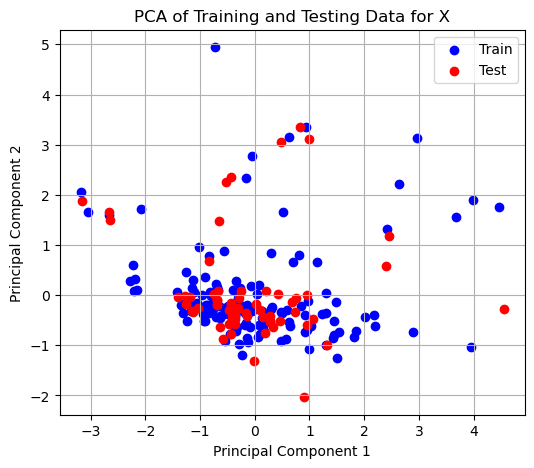

In [7]:
xplot_pca = plt.figure(figsize=(6, 5))
plt.scatter(x_train[:, 0], x_train[:, 1], c='blue', label='Train')
plt.scatter(x_test[:, 0], x_test[:, 1], c='red', label='Test')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training and Testing Data for X')
plt.legend()
plt.grid(True)
plt.show()

xplot_pca.savefig(base_dir + "/_images/PCA_X.jpg")

In [9]:
yplot_pca = plt.figure(figsize=(6, 5))
plt.scatter(y_train[:, 0], c='blue', label='Train')
plt.scatter(y_test[:, 0], c='red', label='Test')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training and Testing Data for Y')
plt.legend()
plt.grid(True)
plt.show()

yplot_pca.savefig(base_dir + "/_images/PCA_Y.jpg")

TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 600x500 with 0 Axes>